<a href="https://colab.research.google.com/github/ankitdv98/IPL-data-analysis/blob/main/IPL_inning_score_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing dataset and libraries

In [2]:
%cd '/content/drive/MyDrive/Kaggle'
!ls

/content/drive/MyDrive/Kaggle
 car_brand_model_resnet50.h5   ipl_data			   test.csv
 creditcardfraud.zip	       kaggle.json		   test.csv.zip
 final_submit.csv	      'Movie Sentiment Analysis'   train.csv
 flight_rf.pkl		       submit.csv		   train.csv.zip


In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [168]:
df= pd.read_csv('ipl_data')

In [169]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [10]:
df.shape

(76014, 15)

In [11]:
df.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [12]:
df.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


#Data Exploration

In [27]:
# mid: id for matches between two particular teams --- To be dropped 
df[['mid', 'bat_team', 'bowl_team']]

,mid,bat_team,bowl_team
0,1,Kolkata Knight Riders,Royal Challengers Bangalore
1,1,Kolkata Knight Riders,Royal Challengers Bangalore
2,1,Kolkata Knight Riders,Royal Challengers Bangalore
3,1,Kolkata Knight Riders,Royal Challengers Bangalore
4,1,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...
76009,617,Mumbai Indians,Rising Pune Supergiant
76010,617,Mumbai Indians,Rising Pune Supergiant
76011,617,Mumbai Indians,Rising Pune Supergiant
76012,617,Mumbai Indians,Rising Pune Supergiant


In [28]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [39]:
# date columns to datetime object
df['date']= pd.to_datetime(df['date'])

In [53]:
data_2015= df[df['date'].dt.year== 2015]

In [54]:
data_2015['bat_team'].unique()
# consistent playing teams

array(['Mumbai Indians', 'Chennai Super Kings', 'Rajasthan Royals',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Sunrisers Hyderabad'], dtype=object)

In [65]:
playing_teams= data_2015['bat_team'].unique()

In [80]:
# keeping only consistent teams
print(" before removing inconsistent teams: ",df.shape[0])
df= df[(df['bat_team'].isin(playing_teams)) & (df['bowl_team'].isin(playing_teams))]
print(" after removing insconsistent teams: ",df.shape[0])

 before removing inconsistent teams:  76014
 after removing insconsistent teams:  53811


In [81]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [233]:
# droping columns which not required
df.drop(columns= ['mid', 'batsman', 'bowler', 'striker', 'non-striker'], axis= 1, inplace= True)

In [234]:
df.head(10)

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222
5,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.5,2,0,222
6,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,3,0,0.6,3,0,222
7,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,3,0,1.1,3,0,222
8,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,7,0,1.2,7,0,222
9,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,11,0,1.3,11,0,222


Individual team stats after every 5 overs on Average

In [241]:
df[df['overs']== 5].groupby(['bat_team']).mean()

,runs,wickets,overs,runs_last_5,wickets_last_5,total
bat_team,,,,,,
Chennai Super Kings,31.500000,0.000000,5.0,29.000000,0.000000,154.000000
Delhi Daredevils,37.333333,1.000000,5.0,36.000000,1.000000,142.000000
Kings XI Punjab,37.666667,1.333333,5.0,34.833333,0.833333,146.500000
Kolkata Knight Riders,40.000000,0.250000,5.0,33.500000,0.250000,155.750000
Mumbai Indians,30.333333,1.666667,5.0,29.000000,1.666667,161.333333
Pune Warriors,39.666667,0.666667,5.0,38.666667,0.666667,156.000000
Rajasthan Royals,37.000000,1.000000,5.0,33.000000,1.000000,165.000000
Rising Pune Supergiant,25.000000,1.000000,5.0,25.000000,1.000000,148.000000
Royal Challengers Bangalore,42.250000,1.250000,5.0,41.000000,1.250000,175.000000


In [243]:
df[df['overs']== 10].groupby(['bat_team']).mean()

,runs,wickets,overs,runs_last_5,wickets_last_5,total
bat_team,,,,,,
Chennai Super Kings,76.000000,3.000000,10.0,34.000000,2.000000,193.0
Deccan Chargers,85.000000,2.000000,10.0,39.000000,1.000000,157.0
Delhi Daredevils,89.000000,0.000000,10.0,48.000000,0.000000,207.0
Kings XI Punjab,107.000000,2.000000,10.0,34.000000,1.000000,195.0
Kochi Tuskers Kerala,56.000000,3.000000,10.0,17.000000,3.000000,132.0
Kolkata Knight Riders,74.000000,3.000000,10.0,25.000000,2.000000,163.0
Mumbai Indians,60.000000,2.000000,10.0,32.000000,1.000000,174.0
Rajasthan Royals,74.333333,2.666667,10.0,40.666667,1.333333,148.0
Royal Challengers Bangalore,105.000000,0.000000,10.0,39.000000,0.000000,226.0


In [247]:
df[df['overs']== 15].groupby(['bat_team']).sum()

,runs,wickets,overs,runs_last_5,wickets_last_5,total
bat_team,,,,,,
Chennai Super Kings,144,3,15.0,55,1,208
Deccan Chargers,122,2,15.0,38,2,196
Delhi Daredevils,448,30,75.0,162,10,608
Kings XI Punjab,911,23,105.0,336,7,1197
Kolkata Knight Riders,84,5,15.0,33,0,136
Rajasthan Royals,129,4,15.0,45,2,159
Royal Challengers Bangalore,322,15,45.0,86,8,463
Sunrisers Hyderabad,310,13,45.0,107,3,461


In [253]:
df[df['overs']== 19.6].groupby(['bat_team']).mean()

,runs,wickets,overs,runs_last_5,wickets_last_5,total
bat_team,,,,,,
Chennai Super Kings,168.071429,5.185714,19.6,50.442857,2.000000,168.071429
Deccan Chargers,161.825000,6.200000,19.6,48.550000,2.675000,161.825000
Delhi Daredevils,163.509804,5.921569,19.6,50.078431,2.274510,163.509804
Gujarat Lions,162.666667,6.666667,19.6,46.750000,2.583333,162.666667
Kings XI Punjab,162.971429,6.428571,19.6,45.728571,2.742857,163.300000
Kochi Tuskers Kerala,144.142857,7.285714,19.6,36.571429,3.571429,144.142857
Kolkata Knight Riders,162.050847,5.728814,19.6,49.033898,2.355932,162.050847
Mumbai Indians,164.025000,6.012500,19.6,51.425000,2.412500,164.025000
Pune Warriors,152.222222,5.833333,19.6,46.333333,2.166667,152.222222


In [92]:
# looking at previous 5 overs stat should be good for prediction
print("Data before removing overs: ",df.shape)
df= df[df['overs']> 5.0]
print("With 5 overs stats: ",df.shape)

Data before removing overs:  (53811, 10)
With 5 overs stats:  (40088, 10)


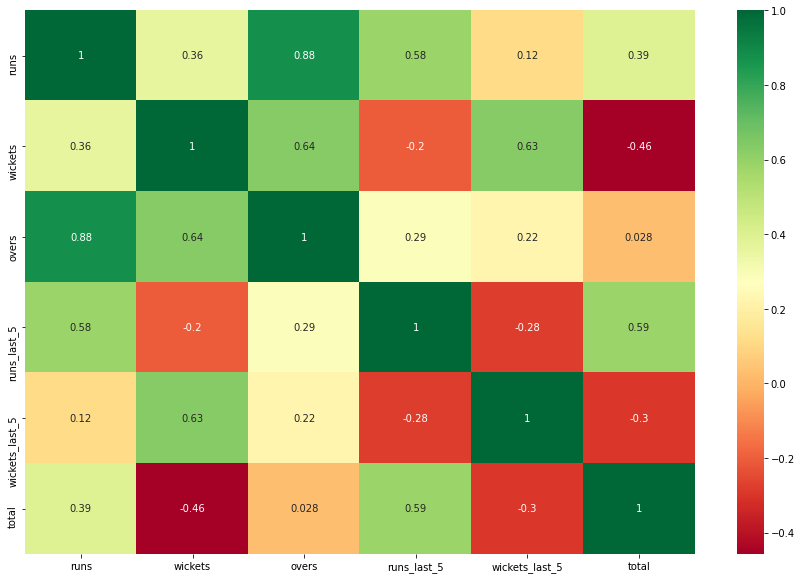

In [93]:
cm= df.corr()
plt.figure(figsize= (15,10))
sns.heatmap(cm, annot= True, cmap= 'RdYlGn')
plt.show()

#Data Preprocessing

In [94]:
df.columns

Index(['date', 'venue', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total'],
      dtype='object')

In [96]:
df['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Sawai Mansingh Stadium',
       'MA Chidambaram Stadium, Chepauk', 'Eden Gardens',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera',
       'Himachal Pradesh Cricket Association Stadium',
       'Subrata Roy Sahara Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket Stadium',
       'Barabati Stadium', 'Maharashtra Cricket Association Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Punjab Cricket Association IS Bi

In [104]:
encoded_df= pd.get_dummies(df, columns= ['bat_team', 'bowl_team'], drop_first= True)
# team_with_zero_encoding= 'Chennai'

In [170]:
encoded_df.head()

,date,venue,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,M Chinnaswamy Stadium,61,0,5.1,59,0,222,0,0,1,0,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,M Chinnaswamy Stadium,61,1,5.2,59,1,222,0,0,1,0,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,M Chinnaswamy Stadium,61,1,5.3,59,1,222,0,0,1,0,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,M Chinnaswamy Stadium,61,1,5.4,59,1,222,0,0,1,0,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,M Chinnaswamy Stadium,61,1,5.5,58,1,222,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [108]:
# Splitting the data set
train= encoded_df[encoded_df['date'].dt.year <= 2016]
test= encoded_df[encoded_df['date'].dt.year >= 2017]

X_train= train.drop(columns= ['total'])
y_train= train['total']

X_test= test.drop(columns= ['total'])
y_test= test['total']

In [109]:
print("train shape {} label {}".format(X_train.shape, y_train.shape))
print("test shape {} label {}".format(X_test.shape, y_test.shape))

train shape (37310, 21) label (37310,)
test shape (2778, 21) label (2778,)


In [111]:
X_train.drop(columns= ['date', 'venue'], axis= 1, inplace= True)
X_test.drop(columns= ['date', 'venue'], axis= 1, inplace= True)

In [112]:
X_train.head()

,runs,wickets,overs,runs_last_5,wickets_last_5,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,61,0,5.1,59,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
33,61,1,5.2,59,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
34,61,1,5.3,59,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
35,61,1,5.4,59,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
36,61,1,5.5,58,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0


#Model

In [114]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

lr_reg= LinearRegression()
lasso_reg= Lasso()
ridge_reg= Ridge()
rf_reg= RandomForestRegressor()

Model Comparison Pipeline

Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) mse: 251.01241656930424 r2 score: 0.7522589217313469
Prediction Distribution


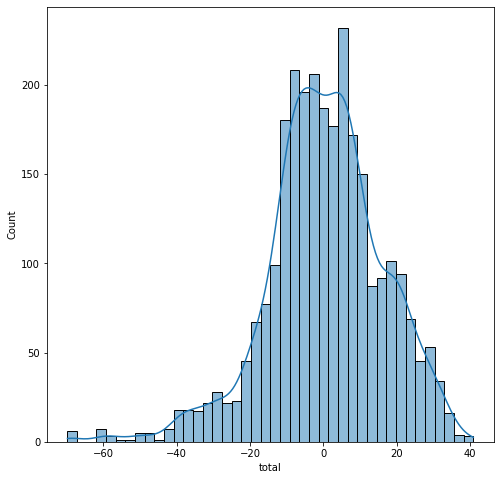

Model: Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) mse: 262.35905700196616 r2 score: 0.7410601572481635
Prediction Distribution


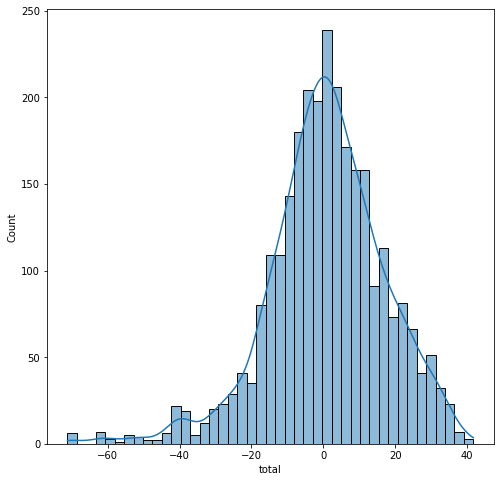

Model: Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) mse: 251.01244158105428 r2 score: 0.7522588970455644
Prediction Distribution


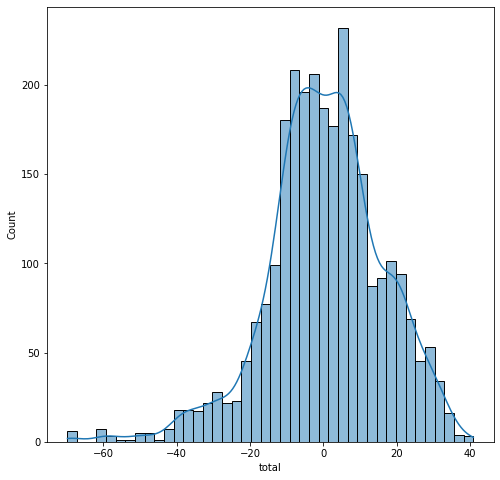

Model: RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) mse: 333.21644864888276 r2 score: 0.6711262199161645
Prediction Distribution


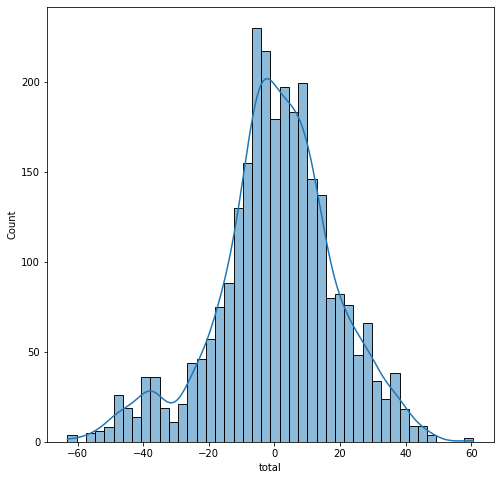

In [129]:
models= [lr_reg, lasso_reg, ridge_reg, rf_reg]

for model in models:
  model.fit(X_train, y_train)
  pred= model.predict(X_test)
  mse= mean_squared_error(y_test, pred)
  r2= r2_score(y_test, pred)
  print("Model: {} mse: {} r2 score: {}".format(model, mse, r2))
  print("Prediction Distribution")
  plt.figure(figsize= (8,8))
  sns.histplot(y_test-pred, kde= True)
  plt.show()


In [ ]:
# Linear Regression models performing good though performing hyperparemeter tuning

# Hyperparemeter Tuning for Lasso

In [137]:
from sklearn.model_selection import RandomizedSearchCV

In [146]:
lasso = Lasso()
parameters= {'alpha': [0.0001,0.001,0.01,0.1,1,2,5,10,15,20,30,40,50,60]}
lasso_regressor=RandomizedSearchCV(lasso,parameters,scoring='neg_mean_squared_error', cv= 5)
lasso_regressor.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=1000, normalize=False,
                                   positive=False, precompute=False,
                                   random_state=None, selection='cyclic',
                                   tol=0.0001, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'alpha': [0.0001, 0.001, 0.01, 0.1, 1,
                                                  2, 5, 10, 15, 20, 30, 40, 50,
                                                  60]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='neg_mean_squared_error',
                   verbose=0)

In [147]:
lasso_regressor.best_params_

{'alpha': 1}

In [148]:
y_pred= lasso_regressor.best_estimator_.predict(X_test)

0.7410601572481635


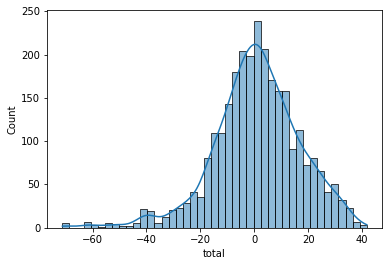

In [149]:
print(r2_score(y_test, y_pred))
plt.figure()
sns.histplot(y_test-y_pred, kde= True)
plt.show()

In [150]:
import pickle
with open('lasso_regressor.pickle', 'wb') as file:
  pickle.dump(lasso_regressor.best_estimator_, file)

# Prediction for 2018 IPL matches

In [158]:
import pickle
with open('lasso_regressor.pickle','rb') as file:
  model= pickle.load(file)

In [159]:
model

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [222]:
def prediction(runs, wickets, overs, runs_last_5, wickets_last_5, bat_team, bowl_team):
  temp= []
  temp= temp + [runs, wickets, overs, runs_last_5, wickets_last_5]

  if bat_team== 'Chennai Super Kings':
    temp = temp + [0,0,0,0,0,0,0]
  elif bat_team== 'Delhi Daredevils':
    temp= temp + [1,0,0,0,0,0,0]
  elif bat_team== 'Kings XI Punjab':
    temp= temp + [0,1,0,0,0,0,0]
  elif bat_team== 'Kolkata Knight Riders':
    temp= temp + [0,0,1,0,0,0,0]
  elif bat_team== 'Mumbai Indians':
    temp= temp + [0,0,0,1,0,0,0]
  elif bat_team== 'Rajasthan Royals':
    temp= temp + [0,0,0,0,1,0,0]
  elif bat_team== 'Royal Challengers Bangalore':
    temp= temp + [0,0,0,0,0,1,0]
  elif bat_team== 'Sunrisers Hyderabad':
    temp= temp + [0,0,0,0,0,0,1]

  if bat_team== 'Chennai Super Kings':
    temp= temp + [0,0,0,0,0,0,0]
  elif bat_team== 'Delhi Daredevils':
    temp= temp + [1,0,0,0,0,0,0]
  elif bat_team== 'Kings XI Punjab':
    temp= temp + [0,1,0,0,0,0,0]
  elif bat_team== 'Kolkata Knight Riders':
    temp= temp + [0,0,1,0,0,0,0]
  elif bat_team== 'Mumbai Indians':
    temp= temp + [0,0,0,1,0,0,0]
  elif bat_team== 'Rajasthan Royals':
    temp= temp + [0,0,0,0,1,0,0]
  elif bat_team== 'Royal Challengers Bangalore':
    temp= temp + [0,0,0,0,0,1,0]
  elif bat_team== 'Sunrisers Hyderabad':
    temp= temp + [0,0,0,0,0,0,1]
  
  array= np.array(temp)

  return model.predict(array.reshape(1, -1))[0]

  
  

In [223]:
prediction(runs= 64, wickets= 3, overs= 8, runs_last_5= 45, wickets_last_5= 1, bat_team= 'Chennai Super Kings', bowl_team= 'Delhi Daredevils')

160.02428259163378